# Feather Fall: Forecasting Conservation Risk Levels for Birds in India

## Problem Statement 
##### India is home to over 1,300 bird species, many of which are increasingly threatened by habitat loss, climate change, and human activity. With conservation resources limited, it's critical to prioritize efforts toward species that are most at risk. However, determining which species need immediate attention remains a significant challenge.
##### This project aims to build a machine learning model that classifies Indian bird species into three conservation concern levels — Low, Moderate, or High — using ecological traits, population trends, migratory behavior, diet, and other biological indicators. By leveraging data-driven predictions, this tool supports early identification of vulnerable species, enabling conservationists and policymakers to take targeted, proactive action. Through this approach, we seek to enhance the effectiveness of conservation planning and contribute to preserving India's avian biodiversity.

## Goal 
##### To support effective bird conservation in India by identifying species at higher conservation risk through predictive modeling, enabling early intervention and better resource allocation.

## Project Objective 
##### To build a machine learning model that classifies Indian bird species into conservation concern levels (Low, Moderate, High) using ecological features such as population trends, diet type, migratory behavior, and distribution range. This model will help prioritize species and regions for focused conservation action

## Importing necessary libraries

In [1]:
# Core Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px              # High-level API for interactive plotting
import plotly.graph_objects as go        # Low-level API for custom plots
from plotly.offline import init_notebook_mode, plot, iplot, download_plotlyjs
import joblib

# Cufflinks (Pandas + Plotly connector)
import cufflinks as cf

# Jupyter Notebook Setup
%matplotlib inline
init_notebook_mode(connected=True)       # Enable Plotly in Jupyter
cf.go_offline()                          # Work in offline mode
cf.set_config_file(world_readable=False, offline=True)


In [2]:
# Scikit-learn (ML)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score )
from sklearn.utils.multiclass import unique_labels
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Loading Data

In [3]:
birds_df = pd.read_excel("data/birds_info.xlsx")
birds_df.head()

,Serial Number,Common Name (India Checklist),Scientific Name (India Checklist),Common Name (eBird 2018),Common Name (eBird 2019),Group,Order,Family,IUCN Status,WLPA Schedule,...,Migratory Status,Diet,Waterbirds,Raptors,Scavengers,Raptors Composite,Waterbirds Composite,Habitat Composite,Endemicity Composite,Diet Composite
0,1,Fulvous Whistling Duck,Dendrocygna bicolor,Fulvous Whistling-Duck,Fulvous Whistling-Duck,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-I,...,Resident,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,NaN,NaN
1,2,Lesser Whistling Duck,Dendrocygna javanica,Lesser Whistling-Duck,Lesser Whistling-Duck,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Resident,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,Resident-Non-Endemics,NaN
2,3,Bar-headed Goose,Anser indicus,Bar-headed Goose,Bar-headed Goose,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Migratory-Local,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,NaN,NaN
3,4,Greylag Goose,Anser anser,Graylag Goose,Graylag Goose,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Migratory-Long-Distance,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,NaN,NaN
4,5,Comb Duck,Sarkidiornis melanotos,Knob-billed Duck,Knob-billed Duck,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Resident,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,Resident-Non-Endemics,NaN


## Understanding Data

In [4]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Serial Number                                         867 non-null    int64  
 1   Common Name (India Checklist)                         867 non-null    object 
 2   Scientific Name (India Checklist)                     867 non-null    object 
 3   Common Name (eBird 2018)                              867 non-null    object 
 4   Common Name (eBird 2019)                              867 non-null    object 
 5   Group                                                 865 non-null    object 
 6   Order                                                 865 non-null    object 
 7   Family                                                865 non-null    object 
 8   IUCN Status                                           867 no

In [5]:
birds_df.shape

(867, 33)

In [6]:
birds_df.describe()

,Serial Number,Long-term Trend (%),Long-term Trend CI (%),Current Annual Change (%),Current Annual Change CI (%),"Distribution Range Size (units of 10,000 sq. km.)","Distribution Range Size CI (units of 10,000 sq. km.)"
count,867.000000,487.000000,487.000000,677.000000,677.000000,856.000000,856.000000
mean,434.000000,-23.771736,35.660908,-1.508480,14.041841,35.951108,0.075573
std,250.425638,40.640144,35.405406,10.239282,21.119122,50.519018,0.035236
min,1.000000,-97.040887,0.914415,-24.033897,1.185877,0.000900,0.000000
25%,217.500000,-53.361035,15.724150,-5.989720,4.787951,5.653592,0.059075
50%,434.000000,-30.045127,26.164983,-2.535760,8.648848,13.659506,0.074500
75%,650.500000,-1.467697,42.704433,1.640885,16.217987,37.720139,0.090525
max,867.000000,171.255544,368.877213,191.156998,400.802847,224.354113,0.441700


## Data Cleaning 

### 1. Removing Unwanted Columns

In [7]:
birds_df = birds_df.drop(['Serial Number','Common Name (India Checklist)','Scientific Name (India Checklist)',
                          'Common Name (eBird 2018)','Order','Family','Distribution Range Size (units of 10,000 sq. km.)',
                          'Distribution Range Size CI (units of 10,000 sq. km.)','Assessed Primarily Based On',
                          'Diet Composite','Waterbirds Composite','Raptors Composite'],axis = 1)

### 2. Renaming Columns Name

In [8]:
birds_df.rename(columns={
    'Common Name (eBird 2019)': 'bird_name',
    'Group': 'group',
    'IUCN Status': 'iucn_status',
    'WLPA Schedule': 'wlpa_schedule',
    'Analysed Long-term': 'analysed_long_term',
    'Analysed Current': 'analysed_current',
    'Long-term Trend (%)': 'long_term_trend',
    'Long-term Trend CI (%)': 'long_term_trend_ci',
    'Current Annual Change (%)': 'current_annual_change',
    'Current Annual Change CI (%)': 'current_annual_change_ci',
    'Long-term Status': 'long_term_status',
    'Current Status': 'current_status',
    'Distribution Status': 'distribution_status',
    'Status of Conservation Concern': 'status_of_conservation_concern',
    'Migratory Status': 'migratory_status',
    'Diet': 'diet',
    'Waterbirds': 'waterbirds',
    'Raptors': 'raptors',
    'Scavengers': 'scavengers',
    'Habitat Composite': 'habitat_type',
    'Endemicity Composite': 'endemicity_type',
}, inplace=True)

### 3. Sorting the Data

In [9]:
birds_df=birds_df.sort_values(by='bird_name').reset_index(drop=True)
birds_df['bird_name'].head(10)

0         Abbott's Babbler
1    Aberrant Bush Warbler
2     Alexandrine Parakeet
3          Alpine Accentor
4             Alpine Swift
5            Alpine Thrush
6           Altai Accentor
7              Amur Falcon
8           Andaman Bulbul
9           Andaman Coucal
Name: bird_name, dtype: object

### 4. Cleaning Birds Name

In [10]:
# Clean bird names in birds_df 
birds_df['bird_name'] = (
    birds_df['bird_name'].str.strip().str.lower().str.replace('-', ' ').str.replace(r'\s+', ' ', regex=True))
birds_df['bird_name'].head(10)

0         abbott's babbler
1    aberrant bush warbler
2     alexandrine parakeet
3          alpine accentor
4             alpine swift
5            alpine thrush
6           altai accentor
7              amur falcon
8           andaman bulbul
9           andaman coucal
Name: bird_name, dtype: object

### 5. Cheking Duplicates

In [11]:
birds_df[birds_df.duplicated()]

,bird_name,group,iucn_status,wlpa_schedule,analysed_long_term,analysed_current,long_term_trend,long_term_trend_ci,current_annual_change,current_annual_change_ci,...,current_status,distribution_status,status_of_conservation_concern,migratory_status,diet,waterbirds,raptors,scavengers,habitat_type,endemicity_type


### 6. Cheking Null Values

In [12]:
birds_df.isna().sum()

bird_name                           0
group                               2
iucn_status                         0
wlpa_schedule                       0
analysed_long_term                382
analysed_current                  192
long_term_trend                   380
long_term_trend_ci                380
current_annual_change             190
current_annual_change_ci          190
long_term_status                    5
current_status                      5
distribution_status                 5
status_of_conservation_concern      5
migratory_status                    0
diet                                9
waterbirds                        741
raptors                           812
scavengers                        857
habitat_type                        0
endemicity_type                   450
dtype: int64

### 7. Handling Null Values 

In [13]:
mode_fill_cols = [
    'group','long_term_status','current_status','distribution_status','status_of_conservation_concern','diet']
for col in mode_fill_cols:
    birds_df[col] = birds_df[col].fillna(birds_df[col].mode()[0])

In [14]:
zero_fill_cols = [
    'analysed_long_term','analysed_current','long_term_trend','long_term_trend_ci','current_annual_change',
    'current_annual_change_ci','waterbirds','raptors','scavengers']
for col in zero_fill_cols:
    birds_df[col] = birds_df[col].fillna(0)

In [15]:
birds_df['endemicity_type']=birds_df['endemicity_type'].fillna("Unknown")
birds_df['endemicity_type'].isna().sum()

0

In [16]:
birds_df.isna().sum()

bird_name                         0
group                             0
iucn_status                       0
wlpa_schedule                     0
analysed_long_term                0
analysed_current                  0
long_term_trend                   0
long_term_trend_ci                0
current_annual_change             0
current_annual_change_ci          0
long_term_status                  0
current_status                    0
distribution_status               0
status_of_conservation_concern    0
migratory_status                  0
diet                              0
waterbirds                        0
raptors                           0
scavengers                        0
habitat_type                      0
endemicity_type                   0
dtype: int64

### 8. Converting Columns Datatype

In [17]:
# Converting Columns to Binary values 
binary_indices = [4,5,16,17,18]
binary_cols = [birds_df.columns[i] for i in binary_indices]
for col in binary_cols:
    birds_df[col] = birds_df[col].apply(lambda x: 1 if str(x).strip().upper() == 'X' else 0)

In [18]:
# A Function to classify bird types based on binary indicator columns.

def get_bird_type(row):
    if row['scavengers'] == 1 & row['raptors']==1:
        return 'scavenger'
    elif row['raptors'] == 1:
        return 'raptor'
    elif row['waterbirds'] == 1:
        return 'waterbird'
    
    else:
        return '0'
# Create the new column
birds_df['bird_type'] = birds_df.apply(get_bird_type, axis=1)

# Now you can drop the old columns if not needed
birds_df.drop(columns=['raptors', 'waterbirds', 'scavengers'], inplace=True)

In [19]:
# Converting Object Columns to Category
category_indices = [1, 2, 3,10,11,12,13,14,15,16,17,18]
cols_to_category = [birds_df.columns[i] for i in category_indices]
birds_df[cols_to_category] = birds_df[cols_to_category].astype('category')

In [20]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   bird_name                       867 non-null    object  
 1   group                           867 non-null    category
 2   iucn_status                     867 non-null    category
 3   wlpa_schedule                   867 non-null    category
 4   analysed_long_term              867 non-null    int64   
 5   analysed_current                867 non-null    int64   
 6   long_term_trend                 867 non-null    float64 
 7   long_term_trend_ci              867 non-null    float64 
 8   current_annual_change           867 non-null    float64 
 9   current_annual_change_ci        867 non-null    float64 
 10  long_term_status                867 non-null    category
 11  current_status                  867 non-null    category
 12  distribution_status   

# EDA (Exploratry Data Analysis)

## Distribution / General Insights

### Top 10 Bird Group

In [21]:
birds_df['group'].value_counts().head(10)

group
Old World Flycatchers                           72
Laughingthrushes and Allies                     52
Shorebirds                                      50
Vultures, Hawks, and Allies                     48
Grouse, Quail, and Allies                       32
Woodpeckers                                     28
Pigeons and Doves                               26
Leaf Warblers                                   25
Tree-Babblers, Scimitar-Babblers, and Allies    22
Waterfowl                                       22
Name: count, dtype: int64

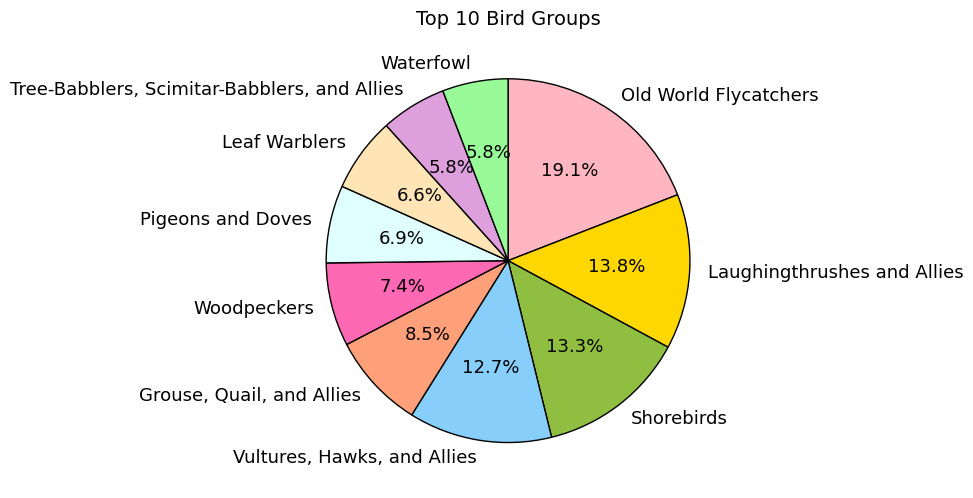

In [22]:
# Top 10 Birds Group 
top_groups = birds_df['group'].value_counts().head(10).reset_index()
top_groups.columns = ['Bird Group', 'Count']
colors = ['#FFB6C1', '#FFD700', '#90BE40', '#87CEFA', '#FFA07A','#FF69B4', '#E0FFFF', '#FFE4B5', '#DDA0DD', '#98FB98']
plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(top_groups['Count'],labels=top_groups['Bird Group'],autopct='%1.1f%%',startangle=90,counterclock= False,
    colors=colors,wedgeprops={'edgecolor': 'black'})

# Beautify text
for text in texts:
    text.set_fontsize(13)
for autotext in autotexts:
    autotext.set_fontsize(13)

plt.title('Top 10 Bird Groups', fontsize=14)
plt.tight_layout()
plt.show()

### Bird Endemicity Type Distribution

In [23]:
# Convert categorical columns to string before grouping
birds_df['endemicity_type'] = birds_df['endemicity_type'].astype(str)
birds_df['status_of_conservation_concern'] = birds_df['status_of_conservation_concern'].astype(str)

# Create counts for sunburst
endemicity_counts = birds_df.groupby(['endemicity_type', 'status_of_conservation_concern']).size().reset_index(name='count')
# Sunburst with pastel colors + black edges + values
fig = px.sunburst(endemicity_counts,path=["endemicity_type", "status_of_conservation_concern"],values="count",
    color="status_of_conservation_concern",color_discrete_sequence=px.colors.qualitative.Pastel)

# Add black borders
fig.update_traces(marker=dict(line=dict(color='black', width=1)),textinfo="label+value+percent entry")

# Layout
fig.update_layout(title="Bird Endemicity Type Distribution by Conservation Concern",paper_bgcolor="white",plot_bgcolor="white")

fig.show()

### Habitat Type Distribution

In [24]:
# Count by Habitat Type → Conservation Concern
habitat_counts = birds_df.groupby(["habitat_type", "status_of_conservation_concern"])["bird_name"].count().reset_index()
habitat_counts.rename(columns={"bird_name": "count"}, inplace=True)
# Custom pastel colors
custom_pastel = ["#FFB3BA", "#BAFFC9", "#FFFFBA"]
# Stacked Bar Chart
fig = px.bar(habitat_counts,x="habitat_type",y="count",color="status_of_conservation_concern",text="count",color_discrete_sequence=custom_pastel )
# Add black edges 
fig.update_traces(marker=dict(line=dict(color='black', width=1)),width=0.6 )
fig.update_layout(
    title="Habitat Type Distribution by Conservation Concern",
    xaxis_title="Habitat Type",yaxis_title="Number of Species",paper_bgcolor="white",
    plot_bgcolor="white",barmode="stack",showlegend=True,
    xaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True) )
fig.show()


### Unique Bird Groups per Conservation Concern

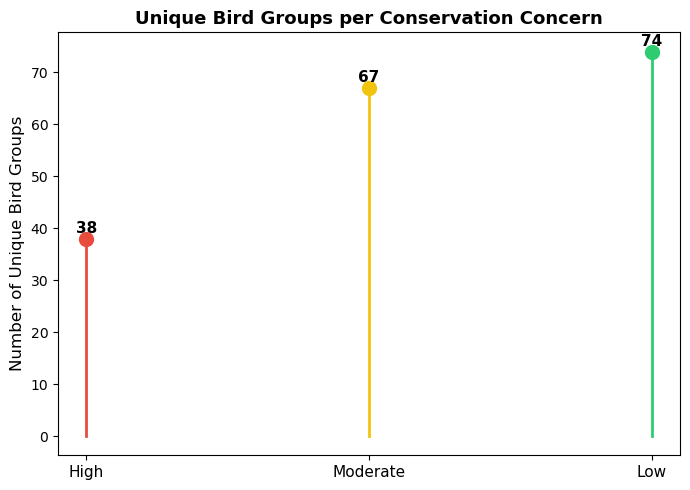

In [25]:
# Prepare unique group-concern pair count
group_concern = birds_df[['group', 'status_of_conservation_concern']].drop_duplicates()
group_concern_count = group_concern['status_of_conservation_concern'].value_counts().reindex(['High', 'Moderate', 'Low'])

# Define custom colors
colors = {'High': '#E74C3C','Moderate': '#F1C40F','Low': '#2ECC71' }   
 
# Set white background
plt.style.use('default')
plt.figure(figsize=(7, 5), facecolor='white')
ax = plt.gca()
ax.set_facecolor("white")

# Plotting lollipop chart
for i, category in enumerate(group_concern_count.index):
    count = group_concern_count[category]
    plt.plot([i, i], [0, count], color=colors[category], linewidth=2)
    plt.plot(i, count, 'o', color=colors[category], markersize=10)
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customizing axes and labels
plt.xticks(range(len(group_concern_count.index)), group_concern_count.index, fontsize=11)
plt.ylabel("Number of Unique Bird Groups", fontsize=12)
plt.title("Unique Bird Groups per Conservation Concern", fontsize=13, weight='bold')

# Remove grid completely
plt.grid(False)
plt.tight_layout()
plt.show()


### Bird Type Distribution

In [26]:
# Count bird types
bird_type_count = birds_df['bird_type'].value_counts().reset_index()
bird_type_count.columns = ['bird_type', 'count']
# Ensure correct type for concatenation
bird_type_count['bird_type'] = bird_type_count['bird_type'].astype(str)
bird_type_count['percentage'] = round((bird_type_count['count'] / bird_type_count['count'].sum()) * 100, 1)
bird_type_count['label'] = bird_type_count['bird_type'] + ' - ' + bird_type_count['percentage'].astype(str) + '%'
# Donut chart
fig = px.pie(bird_type_count,names='label',values='count',hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Bird Type Distribution' )
# Improve size and text layout
fig.update_traces(textinfo='percent+label',textposition='inside',marker=dict(line=dict(color='white', width=2)))
fig.update_traces(textposition='outside',marker_line_width=1,marker_line_color='black')
fig.update_layout(showlegend=False,width=600,height=600,margin=dict(t=60, b=40, l=40, r=40),title_x=0.5 )
fig.show()


### Bird Endemicity Type Distribution

In [27]:
# Step 1: Get count from birds_df
end_df = birds_df['endemicity_type'].value_counts().reset_index()
end_df.columns = ['endemicity_type', 'count']

# Step 2: Plot bar chart
fig = px.bar(end_df,x='endemicity_type',y='count',text='count',color='endemicity_type',color_discrete_sequence=px.colors.qualitative.Pastel1,
    title='Bird Endemicity Type Distribution')

fig.update_traces(textposition='outside',marker_line_width=1,marker_line_color='black')

fig.update_layout(
    xaxis_title='Endemicity Type',
    yaxis_title='Number of Species',
    showlegend=False,height=500,width=800,margin=dict(l=40, r=40, t=80, b=40),paper_bgcolor='white',plot_bgcolor='white',   
    shapes=[       
        dict(type='rect',xref='paper',yref='paper',x0=0,y0=0,x1=1,y1=1,line=dict(color='black', width=2))])
fig.show()

## Conservation Status

### IUCN Status Distribution

In [28]:
# Count of species per IUCN status
iucn_counts = birds_df['iucn_status'].value_counts().reset_index()
iucn_counts.columns = ['IUCN Status', 'Count']

# Sort ascending
iucn_counts = iucn_counts.sort_values("Count", ascending=True)

# Custom pastel colors
colors = ['#FFA07A', '#FFD700', '#90BE40', '#87CEFA', '#FFB6C1']

# Interactive Horizontal Bar
fig = px.bar(iucn_counts,x="Count",y="IUCN Status",orientation="h",text="Count",color="IUCN Status",color_discrete_sequence=colors[:len(iucn_counts)])
fig.update_traces(textposition="outside",marker=dict(line=dict(color="black", width=1)),hovertemplate="<b>%{y}</b><br>Species Count: %{x}")
fig.update_layout(title="IUCN Status Distribution",xaxis_title="Number of Species",yaxis_title="IUCN Status",
    paper_bgcolor="white",plot_bgcolor="white",showlegend=False,
    xaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True))
fig.show()


### WLPA Schedule Distribution

#### * Schedule I: Endangered species needing full protection.
#### * Schedule IV: Non-endangered but protected species.
#### * Schedule V: Vermin—can be hunted without legal consequences.

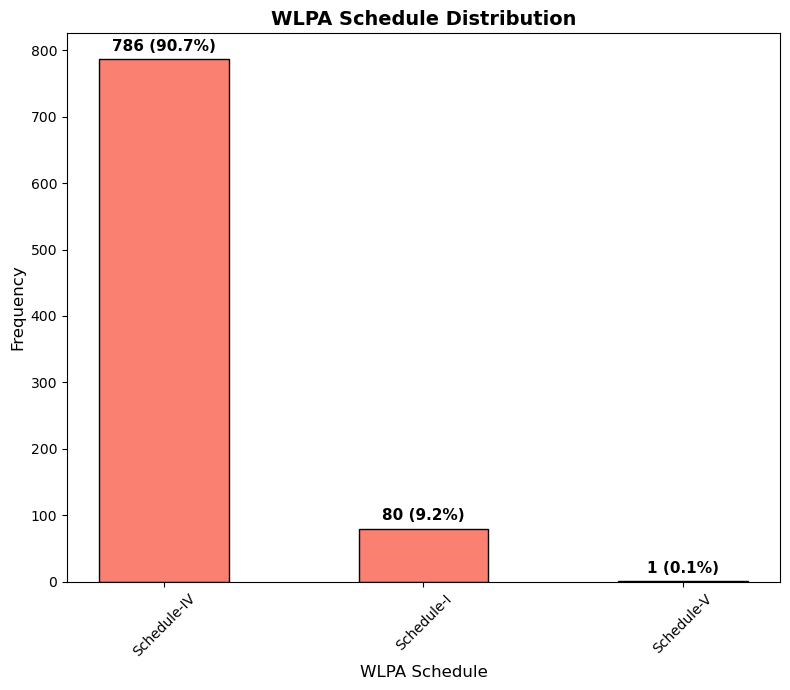

In [29]:
# Calculate counts and percentages
schedule_counts = birds_df['wlpa_schedule'].value_counts()
schedule_percent = birds_df['wlpa_schedule'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(8, 7))
bars = plt.bar(schedule_counts.index, schedule_counts.values, 
               color='salmon', edgecolor='black',width=0.5)

plt.title('WLPA Schedule Distribution', fontsize=14, weight='bold')
plt.xlabel('WLPA Schedule', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)

# Annotate values (Count + % on top of each bar)
for bar, percent in zip(bars, schedule_percent):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,   # center align
             height + (0.01 * schedule_counts.max()),  # thoda upar
             f"{height} ({percent:.1f}%)", 
             ha='center', va='bottom', fontsize=11, weight="bold")

plt.tight_layout()
plt.show()


### IUCN Status vs Migratory Status

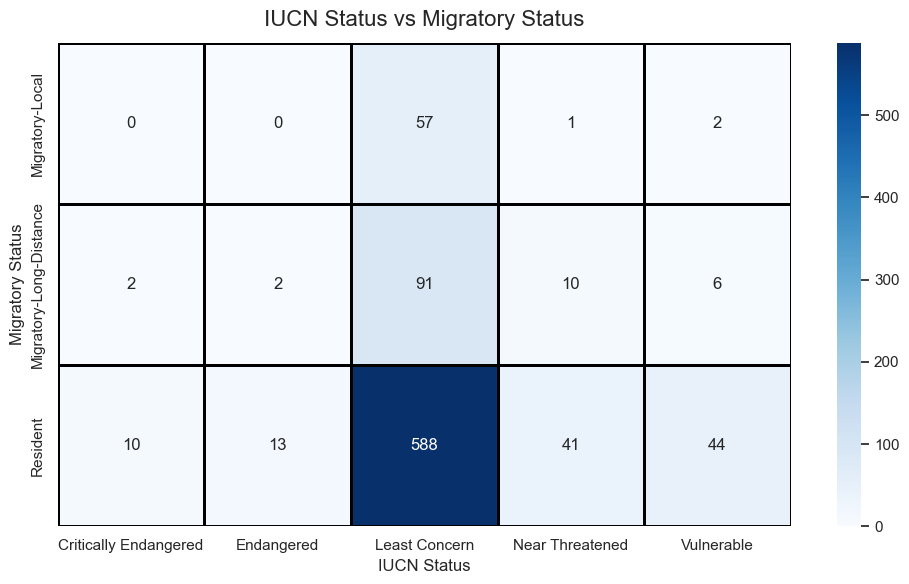

In [30]:
# Create pivot table
heatmap_data = pd.crosstab(birds_df['migratory_status'], birds_df['iucn_status'])
sns.set(style="white")
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(heatmap_data,annot=True,fmt='d',cmap='Blues',linewidths=1,linecolor='black',cbar=True)

# Titles and labels
plt.title("IUCN Status vs Migratory Status", fontsize=16, pad=12)
plt.xlabel("IUCN Status", fontsize=12)
plt.ylabel("Migratory Status", fontsize=12)
plt.tight_layout()
plt.show()

### Habitat Type vs IUCN Status

In [31]:
# Group data
habitat_df = birds_df.groupby(['habitat_type', 'iucn_status']).size().reset_index(name='count')

# Sort habitat types by total count for better visual flow
habitat_order = habitat_df.groupby('habitat_type')['count'].sum().sort_values(ascending=False).index.tolist()

# Plot
fig = px.bar(habitat_df, y='habitat_type',x='count',color='iucn_status',barmode='group',orientation='h',title='Habitat Type vs IUCN Status',
    text='count',category_orders={'habitat_type': habitat_order},color_discrete_sequence=px.colors.qualitative.Set3)

# Update traces for text and bar edges
fig.update_traces(textposition='outside',textfont_size=11,marker_line_color='black',marker_line_width=1.5)

# Update layout for clean white background + axis lines
fig.update_layout(xaxis_title='Number of Species',yaxis_title='Habitat Type',legend_title='IUCN Status',bargap=0.2,height=600,width=900,
    margin=dict(l=80, r=40, t=60, b=40),plot_bgcolor='white',paper_bgcolor='white',
    xaxis=dict(showgrid=False, zeroline=False, showline=True, linecolor='black', linewidth=1),
    yaxis=dict(showgrid=False, zeroline=False, showline=True, linecolor='black', linewidth=1),
    font=dict(size=12))
fig.show()


### IUCN Status vs WLPA Schedule

In [32]:
# Group and normalize
grouped_df = birds_df.groupby(['wlpa_schedule', 'iucn_status']).size().reset_index(name='count')
grouped_df['percent'] = grouped_df.groupby('wlpa_schedule')['count'].transform(lambda x: x / x.sum() * 100)

# Sort for consistent stacking
grouped_df = grouped_df.sort_values(by=['iucn_status', 'wlpa_schedule'])

# Create stacked bars with borders
fig = go.Figure()
colors = px.colors.qualitative.Pastel1

# Map each IUCN status to a color
status_list = grouped_df['iucn_status'].unique()
color_map = {status: colors[i % len(colors)] for i, status in enumerate(status_list)}

for status in status_list:
    df_subset = grouped_df[grouped_df['iucn_status'] == status]
    fig.add_trace(go.Bar(x=df_subset['wlpa_schedule'],y=df_subset['percent'],name=status,text=[f'{p:.1f}%' for p in df_subset['percent']],
        textposition='inside',marker=dict(color=color_map[status],line=dict(color='black', width=2))))

# Step 4: Layout tweaks
fig.update_layout(barmode='stack',title='IUCN Status Distribution by WLPA Schedule',
    xaxis=dict(title='WLPA Schedule', showgrid=False, linecolor='black'),
    yaxis=dict(title='Percentage', range=[0, 100], showgrid=True, linecolor='black'),
    plot_bgcolor='white',paper_bgcolor='white',height=600,width=900,legend_title='IUCN Status')

fig.show()

### IUCN Status vs Conservation Concern

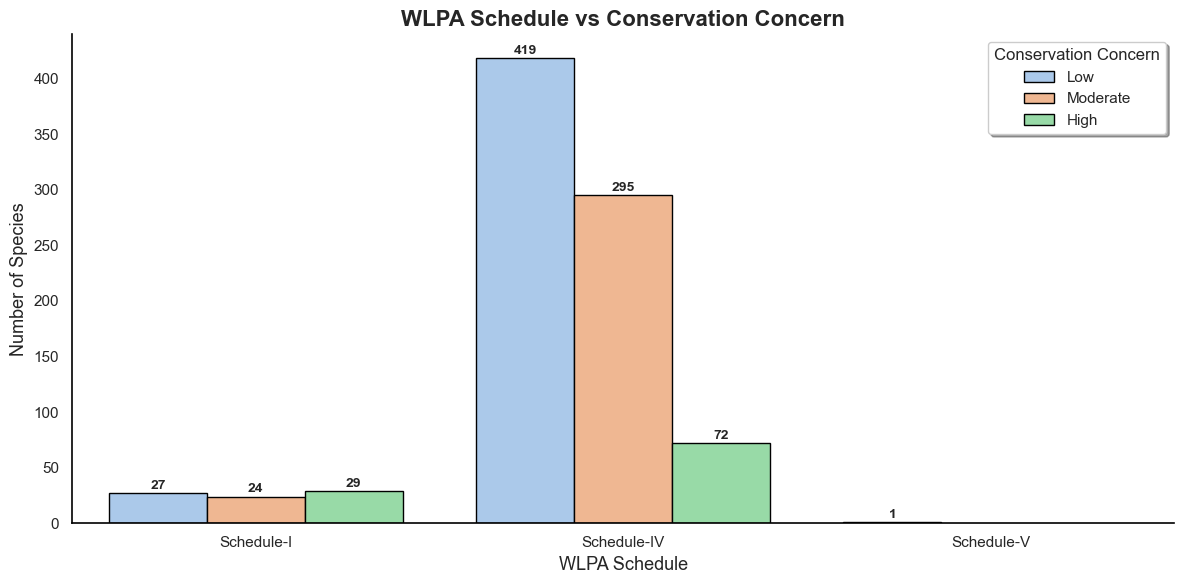

In [33]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Countplot with edge color
sns.countplot(data=birds_df,x="wlpa_schedule",hue="status_of_conservation_concern",palette="pastel",edgecolor="black",ax=ax)

# Set white background
fig.patch.set_facecolor('white')      
ax.set_facecolor('white')            

# Show axis lines
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)

# Titles and axis labels
ax.set_title("WLPA Schedule vs Conservation Concern", fontsize=16, fontweight='bold')
ax.set_xlabel("WLPA Schedule", fontsize=13)
ax.set_ylabel("Number of Species", fontsize=13)

# Tick styling
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)



# Add counts above bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                int(height),
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold'
            )

ax.legend(title='Conservation Concern',title_fontsize=12,fontsize=11,loc='upper right',frameon=True,shadow=True)
plt.tight_layout()
plt.show()

## Population Trends

### Long-Term Trend Distribution

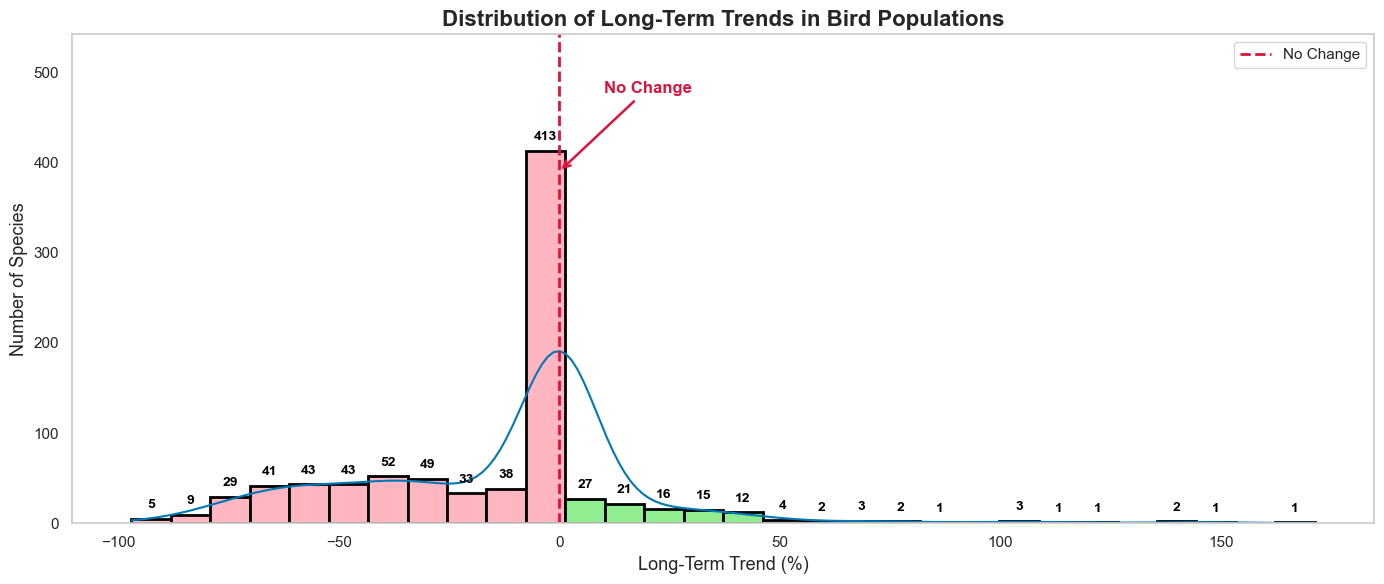

In [34]:
sns.set(style="whitegrid")
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Set white background
fig.patch.set_facecolor('white')  
ax.set_facecolor('white')         
ax.grid(False)
# Define colors based on bar positions
colors = []
for val in birds_df['long_term_trend']:
    if val < 0:
        colors.append('red')
    elif val > 0:
        colors.append('green')
    else:
        colors.append('gray')  # Neutral for 0

# Plot histogram 
sns.histplot(birds_df['long_term_trend'],bins=30,kde=True,color="#0077b6",edgecolor="black",linewidth=2,ax=ax)

# Now manually color the bars
for patch in ax.patches:
    x_center = patch.get_x() + patch.get_width()/2
    # Find which bin center the bar corresponds to
    if x_center < 0:
        patch.set_facecolor('lightpink')
    elif x_center > 0:
        patch.set_facecolor('lightgreen')
    else:
        patch.set_facecolor('gray')

# Vertical line at 0 (no change)
ax.axvline(x=0, color='crimson', linestyle='--', linewidth=2, label='No Change')

# Get current limits
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.25)

# Add bar value annotations
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        ax.text(
            x, height + y_max * 0.02,
            f"{int(height)}",
            ha='center', va='bottom',
            fontsize=10, fontweight='semibold', color='black'
        )

# Add annotation for no change line
ax.annotate('No Change',xy=(0, y_max * 0.9),xytext=(10, y_max * 1.1),arrowprops=dict(arrowstyle='->', color='crimson', lw=1.8),fontsize=12,
    color='crimson',fontweight='bold')

# Titles and labels
ax.set_title('Distribution of Long-Term Trends in Bird Populations', fontsize=16, fontweight='bold')
ax.set_xlabel('Long-Term Trend (%)', fontsize=13)
ax.set_ylabel('Number of Species', fontsize=13)
ax.legend()

# Tight layout
plt.tight_layout()
plt.show()


### Comparison of Analysed Long Term vs Current

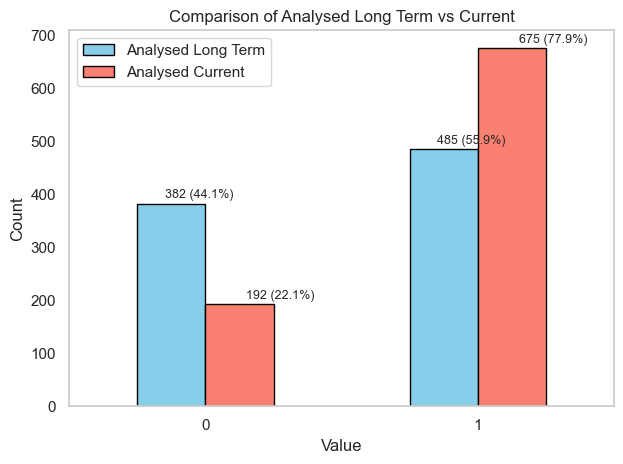

In [35]:
# Value counts
long_term = birds_df['analysed_long_term'].value_counts().sort_index()
current = birds_df['analysed_current'].value_counts().sort_index()

# Combine into a DataFrame
df_plot = pd.DataFrame({'Analysed Long Term': long_term,'Analysed Current': current})

# Plot
ax = df_plot.plot(kind='bar', color=['skyblue', 'salmon'],edgecolor='black')
plt.title('Comparison of Analysed Long Term vs Current')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Remove grid
ax.grid(False)

# Add value and percentage labels
total_long = long_term.sum()
total_current = current.sum()

for i, (lt, ct) in enumerate(zip(long_term, current)):
    plt.text(i - 0.15, lt + 10, f'{lt} ({lt/total_long:.1%})', fontsize=9)
    plt.text(i + 0.15, ct + 10, f'{ct} ({ct/total_current:.1%})', fontsize=9)

plt.tight_layout()
plt.show()

## Diet & Ecology

### Diet Type Distribution across Migratory Status

In [36]:
# Get unique diet types and migratory statuses
diets = birds_df['diet'].unique()
migratory_statuses = birds_df['migratory_status'].unique()

# Define pastel1 color palette
palette = px.colors.qualitative.Bold
color_map = {diet: palette[i % len(palette)] for i, diet in enumerate(diets)}

# Create traces for each diet type
traces = []
for diet in diets:
    counts = birds_df[birds_df['diet'] == diet]['migratory_status'].value_counts()
    counts = counts.reindex(migratory_statuses, fill_value=0)
    traces.append(
        go.Bar(x=migratory_statuses,y=counts.values,name=diet,marker=dict(color=color_map[diet],line=dict(color='black', width=2)),
            text=counts.values,textposition='outside'))

# Create figure
fig = go.Figure(data=traces)

# Layout
fig.update_layout(barmode='group',title='Diet Type Distribution Across Migratory Status',
    xaxis_title='Migratory Status', yaxis_title='Number of Species',
    plot_bgcolor='white',
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2, mirror=True),
    yaxis=dict(showgrid=False, linecolor='black', linewidth=2, mirror=True),
    font=dict(size=12),
    legend_title='Diet Type')
fig.show()

### Diet Type vs WLPA Schedule

In [37]:
# Get unique diet types and WLPA schedules
diets = birds_df['diet'].unique()
schedules = birds_df['wlpa_schedule'].unique()
palette = px.colors.qualitative.Plotly
color_map = {diet: palette[i % len(palette)] for i, diet in enumerate(diets)}

# Create traces for each diet type
traces = []
for diet in diets:
    counts = birds_df[birds_df['diet'] == diet]['wlpa_schedule'].value_counts()
    counts = counts.reindex(schedules, fill_value=0)
    traces.append(go.Bar(x=schedules,y=counts.values,name=diet,marker=dict(
                color=color_map[diet],
                line=dict(color='black', width=1)  # bar edges
            ),
            text=counts.values,
            textposition='outside'
        )
    )

# Create figure
fig = go.Figure(data=traces)

# Layout
fig.update_layout(
    barmode='group',
    title='Diet Type vs WLPA Schedule',
    xaxis_title='WLPA Schedule',
    yaxis_title='Number of Species',
    xaxis=dict(showline=True, linecolor='black', linewidth=2, showgrid=False),
    yaxis=dict(showline=True, linecolor='black', linewidth=2, showgrid=False),
    plot_bgcolor='white',
    legend_title='Diet Type',
    font=dict(size=12),
    hovermode='x unified',
    height=600
)

fig.show()


### Habitat Type vs Diet Type

In [38]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Aggregate counts
sankey_df = birds_df.groupby(['habitat_type', 'diet']).size().reset_index(name='count')

# Create unique labels
labels = list(pd.unique(sankey_df['habitat_type'].tolist() + sankey_df['diet'].tolist()))

# Map source and target indices
sankey_df['source'] = sankey_df['habitat_type'].apply(lambda x: labels.index(x))
sankey_df['target'] = sankey_df['diet'].apply(lambda x: labels.index(x))

# Assign light pastel colors to each habitat type
pastel_colors = px.colors.qualitative.Pastel1
habitats = sankey_df['habitat_type'].unique()
habitat_color_map = {hab: pastel_colors[i % len(pastel_colors)] for i, hab in enumerate(habitats)}

# Map link colors based on their source habitat
link_colors = [habitat_color_map[src] for src in sankey_df['habitat_type']]

# Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=1.5),  # node edges
        label=labels,
        color="lightgray"  # neutral node color
    ),
    link=dict(
        source=sankey_df['source'],
        target=sankey_df['target'],
        value=sankey_df['count'],
        color=link_colors,
        line=dict(color='black', width=0.5)  # link edges
    )
))

fig.update_layout(
    title_text="Habitat Type  Diet Type ",
    font_size=12,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()


## Migratory Patterns

### Migratory Status Distribution

In [39]:
import plotly.express as px
import pandas as pd

# Count species by migratory status
migratory_counts = birds_df['migratory_status'].value_counts().reset_index()
migratory_counts.columns = ['migratory_status', 'count']

# Donut chart
fig = px.pie(
    migratory_counts,
    names='migratory_status',
    values='count',
    color='migratory_status',
    color_discrete_sequence=px.colors.qualitative.Pastel2,
    hole=0.4,  # makes it a donut chart
    title='Migratory Status Distribution'
)

# Add black edges and values
fig.update_traces(
    textinfo='label+percent+value',
    textfont_size=12,
    marker=dict(line=dict(color='black', width=1.5))
)

# Layout styling
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(size=16),
    height=600
)

fig.show()


### Migratory Status vs Bird Group

In [40]:
import plotly.express as px
import pandas as pd

# Crosstab: Bird group vs migratory status
group_mig_ct = pd.crosstab(birds_df['group'], birds_df['migratory_status'])

# Select top 10 groups by total species
top_groups = group_mig_ct.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_ct = group_mig_ct.loc[top_groups]

# Convert to long format for treemap
df_long = filtered_ct.reset_index().melt(id_vars='group', var_name='migratory_status', value_name='count')

# Treemap
fig = px.treemap(
    df_long,
    path=['group', 'migratory_status'],  # hierarchy: group → migratory status
    values='count',
    color='migratory_status',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    labels={'count':'Number of Species', 'group':'Bird Group', 'migratory_status':'Migratory Status'},
    title='Top 10 Bird Groups '
)

# Add black edges
# fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))
# Add black edges and show values on rectangles + hover
fig.update_traces(
    marker=dict(line=dict(color='black', width=2)),
    textinfo="label+value+percent parent",  # shows label, value, % of parent
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percent of group: %{percentParent:.1%}<extra></extra>')
# Layout styling
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(size=12),
    height=600
)

fig.show()


In [41]:
df = birds_df.groupby(['migratory_status', 'habitat_type']).size().reset_index(name='count')

fig = px.bar(
    df,
    x='migratory_status',
    y='count',
    color='habitat_type',
    text='count',
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    labels={'count':'Number of Species', 'migratory_status':'Migratory Status', 'habitat_type':'Habitat Type'},
    title='Migratory Status vs Habitat Type'
)

fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white', font=dict(size=12), height=600)
fig.show()


### Migratory Status vs Conservation Concern

In [42]:
# Group by migratory status and conservation concern (IUCN)
df = birds_df.groupby(['migratory_status', 'iucn_status']).size().reset_index(name='count')

# Stacked bar chart
fig = px.bar(
    df,
    x='migratory_status',
    y='count',
    color='iucn_status',
    text='count',
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    labels={'count':'Number of Species', 'migratory_status':'Migratory Status', 'iucn_status':'IUCN Status'},
    title='Migratory Status vs Conservation Concern'
)

# Add black edges and value labels
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))

# Layout
fig.update_layout(
    xaxis=dict(showline=True, linecolor='black', linewidth=2, showgrid=False),
    yaxis=dict(showline=True, linecolor='black', linewidth=2, showgrid=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=12),
    hovermode='x unified',
    height=600
)

fig.show()


## Correlation 

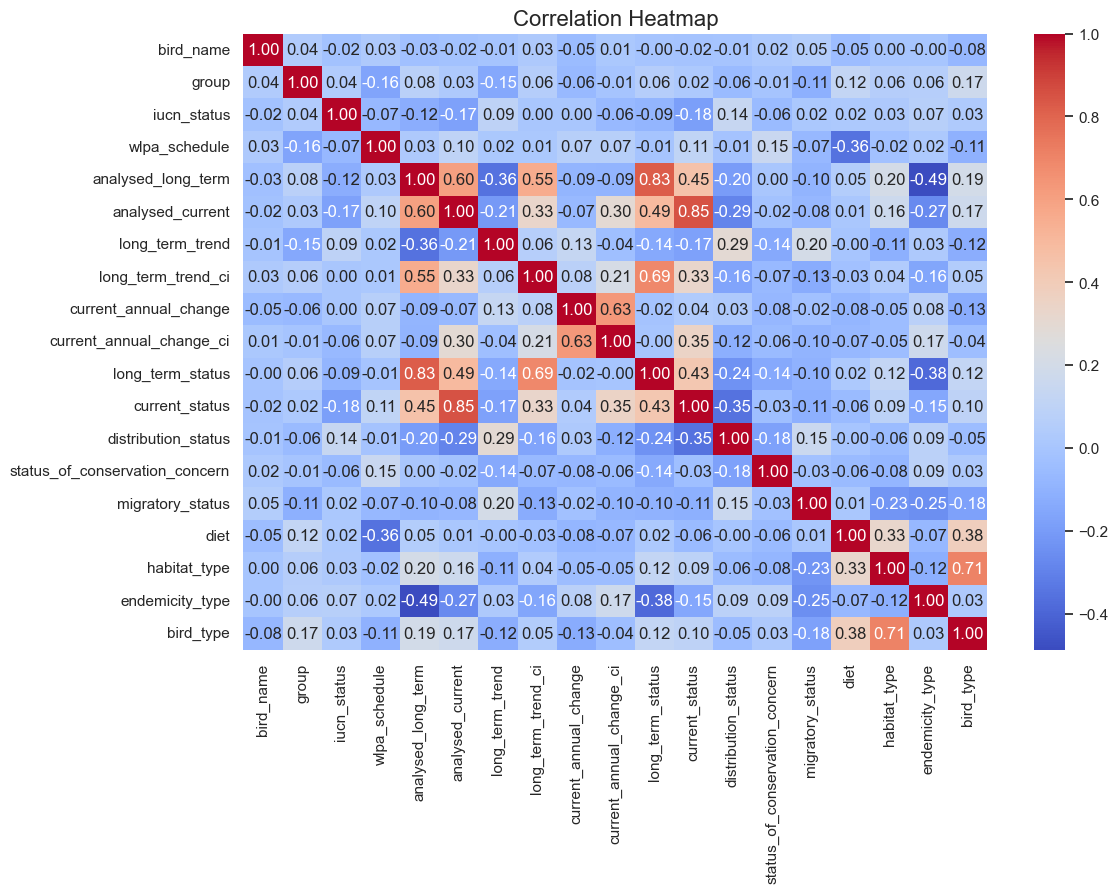

In [43]:
# Encode categorical (only for correlation purpose)
categorical_cols = birds_df.select_dtypes(include=['category', 'object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    birds_df[col] = le.fit_transform(birds_df[col])
    label_encoders[col] = le  

# Correlation Matrix
corr_matrix = birds_df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,cmap="coolwarm",annot=True,fmt=".2f",cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()



 Top 5 Correlated Feature Pairs:
analysed_current          current_status           0.853226
long_term_status          analysed_long_term       0.825260
bird_type                 habitat_type             0.709372
long_term_status          long_term_trend_ci       0.686885
current_annual_change_ci  current_annual_change    0.630826
dtype: float64


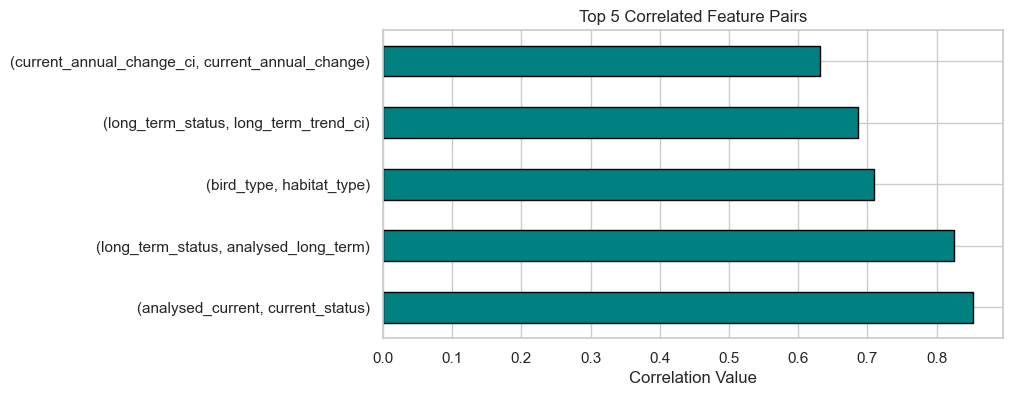

In [44]:
# Top 5 Correlated Pairs
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Remove self correlations
corr_pairs = corr_pairs[corr_pairs < 1]

# Remove duplicate pairs (A-B and B-A)
corr_pairs = corr_pairs.drop_duplicates()

top_5_corr = corr_pairs.head(5)
print("\n Top 5 Correlated Feature Pairs:")
print(top_5_corr)

#Barplot of top 5
top_5_corr.plot(kind="barh", figsize=(8,4), color="teal", edgecolor="black")
plt.title("Top 5 Correlated Feature Pairs")
plt.xlabel("Correlation Value")
plt.show()

# Machine Learning 

### Droping Unnecessary Columns

In [45]:
# Step 1: Drop unnecessary columns
birds_df = birds_df.drop(columns=['bird_name'])

In [46]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   group                           867 non-null    int32  
 1   iucn_status                     867 non-null    int32  
 2   wlpa_schedule                   867 non-null    int32  
 3   analysed_long_term              867 non-null    int64  
 4   analysed_current                867 non-null    int64  
 5   long_term_trend                 867 non-null    float64
 6   long_term_trend_ci              867 non-null    float64
 7   current_annual_change           867 non-null    float64
 8   current_annual_change_ci        867 non-null    float64
 9   long_term_status                867 non-null    int32  
 10  current_status                  867 non-null    int32  
 11  distribution_status             867 non-null    int32  
 12  status_of_conservation_concern  867 

## Preprocessing Data (Split + Encoding + Scaling )

In [47]:
#Train-Validation-Test Split
target_col = 'status_of_conservation_concern'

# First split: Train+Val and Test
train_val_df, test_df = train_test_split(birds_df, test_size=0.2, random_state=42)

# Second split: Train and Validation
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  

# Drop rows with missing target
train_df = train_df.dropna(subset=[target_col])

# Inputs and Targets
train_input = train_df.drop(columns=[target_col])
val_input   = val_df.drop(columns=[target_col])
test_input  = test_df.drop(columns=[target_col])

train_target = train_df[target_col]
val_target   = val_df[target_col]
test_target  = test_df[target_col]

# Encoding Target Variable
target_encoder = LabelEncoder()
train_target = target_encoder.fit_transform(train_target)
val_target   = target_encoder.transform(val_target)
test_target  = target_encoder.transform(test_target)

# Identify Column Types
numeric_cols     = train_input.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_input.select_dtypes(include='category').columns.tolist()

# Scale Numeric Features
scaler = MinMaxScaler().fit(train_input[numeric_cols])

train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
val_input[numeric_cols]   = scaler.transform(val_input[numeric_cols])
test_input[numeric_cols]  = scaler.transform(test_input[numeric_cols])

# Encode Categorical Features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_input[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
val_input[encoded_cols]   = encoder.transform(val_input[categorical_cols])
test_input[encoded_cols]  = encoder.transform(test_input[categorical_cols])

# Final input data
X_train = train_input[numeric_cols + encoded_cols]
X_val   = val_input[numeric_cols + encoded_cols]
X_test  = test_input[numeric_cols + encoded_cols]



# Decision Tree Model

In [48]:
# Model Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_target)

# Evaluation Function

def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"\n📊 {dataset_name} Results")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1-Score :", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Validation
val_preds = model.predict(X_val)
evaluate_model(val_target, val_preds, "Validation")

# Test
test_preds = model.predict(X_test)
evaluate_model(test_target, test_preds, "Test")



📊 Validation Results
Accuracy : 0.9770114942528736
Precision: 0.9775676677790137
Recall   : 0.9770114942528736
F1-Score : 0.9769386916079963

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.99      0.99      0.99        91
           2       0.95      0.98      0.97        60

    accuracy                           0.98       174
   macro avg       0.98      0.96      0.97       174
weighted avg       0.98      0.98      0.98       174


📊 Test Results
Accuracy : 0.9137931034482759
Precision: 0.9160188005544738
Recall   : 0.9137931034482759
F1-Score : 0.9130726798457025

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.97      0.95      0.96        94
           2       0.85      0.93      0.89        59

    accuracy                           0.91       174
   macro avg       0.

## Random Forest Model

In [49]:
# Model Training 
rf_model = RandomForestClassifier(
    n_jobs=-1,
    random_state=42
)
rf_model.fit(X_train, train_target)

# Evaluation Function 
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"\n📊 {dataset_name} Results")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1-Score :", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Validation
val_preds = rf_model.predict(X_val)
evaluate_model(val_target, val_preds, "Validation (RF)")

# Test
test_preds = rf_model.predict(X_test)
evaluate_model(test_target, test_preds, "Test (RF)")



📊 Validation (RF) Results
Accuracy : 0.9597701149425287
Precision: 0.9604458252586462
Recall   : 0.9597701149425287
F1-Score : 0.9592468265815609

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.96      1.00      0.98        91
           2       0.95      0.93      0.94        60

    accuracy                           0.96       174
   macro avg       0.97      0.93      0.95       174
weighted avg       0.96      0.96      0.96       174


📊 Test (RF) Results
Accuracy : 0.9540229885057471
Precision: 0.9544555679149672
Recall   : 0.9540229885057471
F1-Score : 0.9534164894666461

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.98      0.98      0.98        94
           2       0.92      0.97      0.94        59

    accuracy                           0.95       174
   macro av

##  XGBoost Model 

In [50]:
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    max_depth=5,
    n_estimators=200,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1
)

xgb_model.fit(X_train, train_target)

# Validation Predictions & Evaluation
val_preds_xgb = xgb_model.predict(X_val)
evaluate_model(val_target, val_preds_xgb, "Validation (XGBoost)")

# Test Predictions & Evaluation
test_preds_xgb = xgb_model.predict(X_test)
evaluate_model(test_target, test_preds_xgb, "Test (XGBoost)")



📊 Validation (XGBoost) Results
Accuracy : 0.9597701149425287
Precision: 0.9605177580432417
Recall   : 0.9597701149425287
F1-Score : 0.959459848203901

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.97      0.99      0.98        91
           2       0.93      0.95      0.94        60

    accuracy                           0.96       174
   macro avg       0.97      0.94      0.95       174
weighted avg       0.96      0.96      0.96       174


📊 Test (XGBoost) Results
Accuracy : 0.9712643678160919
Precision: 0.9714805055607222
Recall   : 0.9712643678160919
F1-Score : 0.9711995780293411

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.99      0.98      0.98        94
           2       0.95      0.98      0.97        59

    accuracy                           0.97       174
  

### Feature Importance

In [51]:
model.feature_importances_

array([0.00878909, 0.18131838, 0.        , 0.        , 0.        ,
       0.15204391, 0.01224556, 0.08317196, 0.02381384, 0.1878671 ,
       0.24776236, 0.08538473, 0.        , 0.00329591, 0.        ,
       0.01430718, 0.        ])

## Top 5 Feature Importance 

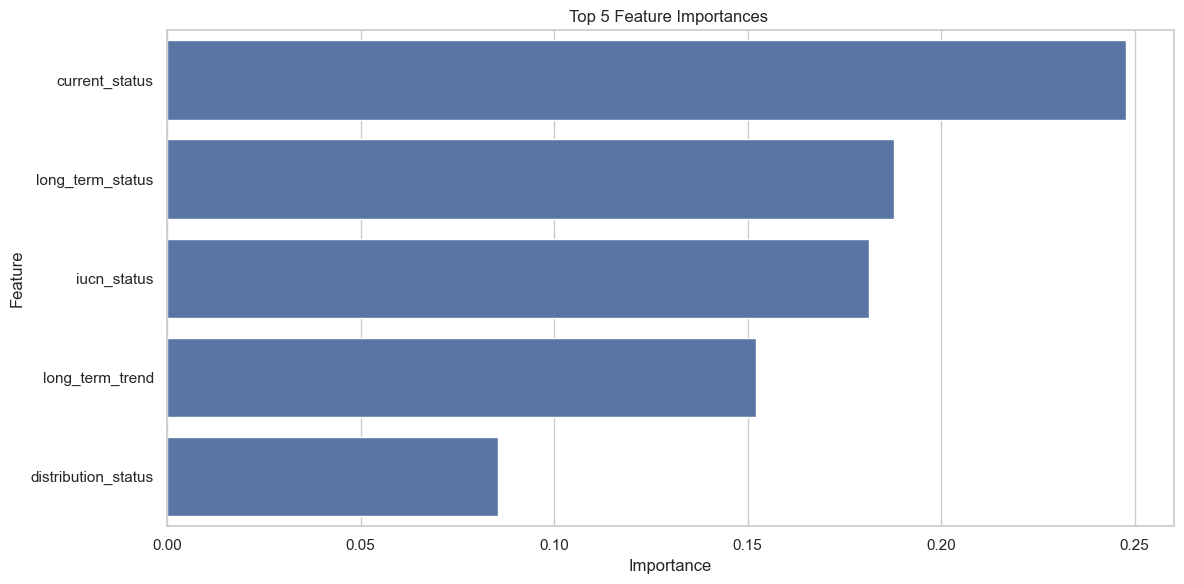

In [52]:
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:5], y=feature_names[indices][:5])
plt.title("Top 5 Feature Importances ")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Comparison Between Models 

🔎 Model Accuracy Comparison:

Decision Tree             : 91.30%
Random Forest             : 95.40%
XGBoost                   : 97.10%


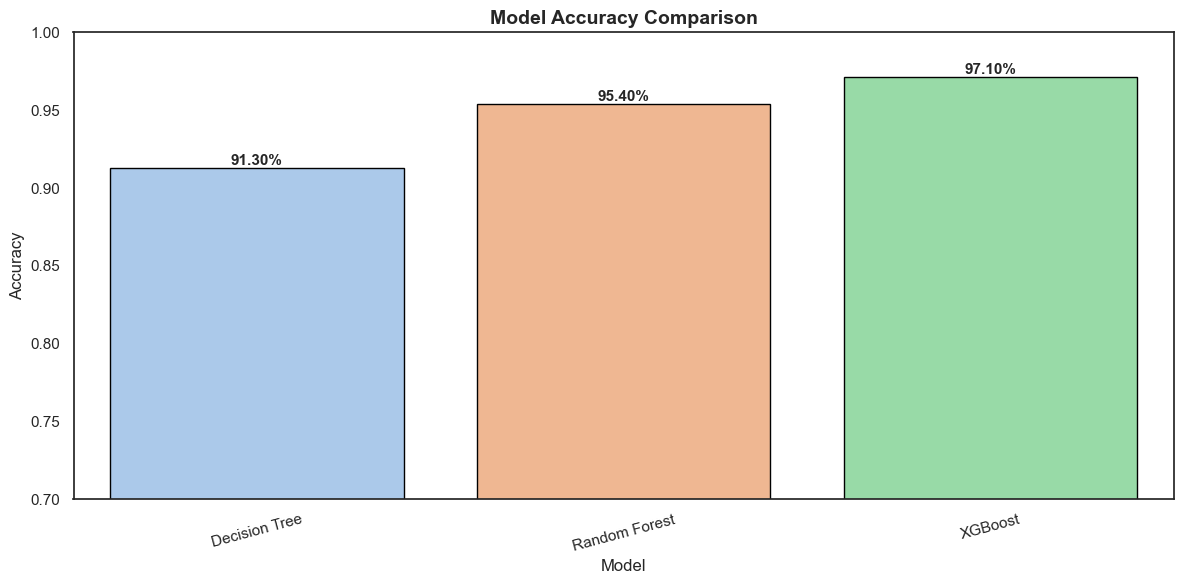

In [53]:

# Base accuracies
accuracies = {
     "Decision Tree": 0.913,
    "Random Forest": 0.954,
    "XGBoost": 0.971
}

# Step 1: Print all values
print("🔎 Model Accuracy Comparison:\n")
for model, acc in accuracies.items():
    print(f"{model:<25} : {acc*100:.2f}%")

# Step 2: Plot
plt.figure(figsize=(12, 6))
sns.set_style("white")

# Extract model names and scores
model_names = list(accuracies.keys())
model_scores = list(accuracies.values())

# Plot bars with pastel colors and black edge
bars = sns.barplot(
    x=model_names,
    y=model_scores,
    palette="pastel",
    edgecolor='black'
)

# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'{height*100:.2f}%',
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=11, fontweight='bold'
    )

# Clean styling
plt.ylim(0.70, 1.00)  # ✅ adjusted lower limit
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, weight='bold')
plt.xticks(rotation=15)
plt.gca().set_facecolor("white")
plt.grid(False)  # ✅ removed grid
plt.tight_layout()

plt.show()


# Prediction

In [54]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   group                           867 non-null    int32  
 1   iucn_status                     867 non-null    int32  
 2   wlpa_schedule                   867 non-null    int32  
 3   analysed_long_term              867 non-null    int64  
 4   analysed_current                867 non-null    int64  
 5   long_term_trend                 867 non-null    float64
 6   long_term_trend_ci              867 non-null    float64
 7   current_annual_change           867 non-null    float64
 8   current_annual_change_ci        867 non-null    float64
 9   long_term_status                867 non-null    int32  
 10  current_status                  867 non-null    int32  
 11  distribution_status             867 non-null    int32  
 12  status_of_conservation_concern  867 

In [55]:

# ===========================================
# 2. Load Dataset
# ===========================================
birds_df = pd.read_excel("data/my_data.xlsx")

# Define columns
categorical_cols = [
    'group', 'migratory_status', 'diet', 'habitat_type',
    'wlpa_schedule', 'iucn_status', 'long_term_status',
    'current_status', 'distribution_status', 'endemicity_type', 'bird_type'
]
numeric_cols = [
    'analysed_long_term', 'analysed_current',
    'long_term_trend', 'current_annual_change'
]
target_col = 'status_of_conservation_concern'

# Make sure categorical columns are strings
for col in categorical_cols:
    birds_df[col] = birds_df[col].astype(str)

# Drop missing target values
birds_df = birds_df.dropna(subset=[target_col])

# ===========================================
# 3. Encode Target
# ===========================================
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(birds_df[target_col])
X = birds_df[categorical_cols + numeric_cols]

# Save target encoder
joblib.dump(target_encoder, "models/target_encoders.pkl")

# ===========================================
# 4. Split Data
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# ===========================================
# 5. Preprocessor
# ===========================================
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# ===========================================
# 6. Build Pipeline with XGBoost
# ===========================================
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', XGBClassifier(
        objective="multi:softprob",
        eval_metric="mlogloss",
        num_class=len(target_encoder.classes_), 
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

# ===========================================
# 7. Train Model
# ===========================================
pipeline.fit(X_train, y_train)

# Save trained pipeline
joblib.dump(pipeline, "models/bird_conservation_model_xgb.pkl")
print("✅ XGBoost Model and encoder saved successfully!")

# ===========================================
# 8. Prediction Function
# ===========================================
def predict_status(bird_info, model_path="models/bird_conservation_model_xgb.pkl", 
                   encoder_path="models/target_encoders.pkl"):

    # Load model + encoder
    pipeline = joblib.load(model_path)
    target_encoder = joblib.load(encoder_path)

    # Convert dict to DataFrame
    new_input_df = pd.DataFrame([bird_info])

    # Prediction
    prediction = pipeline.predict(new_input_df)[0]
    prediction_proba = pipeline.predict_proba(new_input_df)[0]

    # Decode label + get confidence
    pred_label = target_encoder.inverse_transform([prediction])[0]
    confidence = prediction_proba[prediction]

    return pred_label, round(confidence, 4)

# ===========================================
# 9. Example Usage
# ===========================================
bird_info = {
    'group': 'Waterbirds',
    'iucn_status': 'Least Concern',
    'wlpa_schedule': 'Schedule IV',
    'analysed_long_term': 1,
    'analysed_current': 1,
    'long_term_trend': -25.3,
    'current_annual_change': -2.7,
    'long_term_status': 'Decreasing',
    'current_status': 'Stable',
    'distribution_status': 'Widespread',
    'migratory_status': 'Migrant',
    'diet': 'Omnivore',
    'habitat_type': 'Wetland',
    'endemicity_type': 'Not Endemic',
    'bird_type': 'Waterbirds'
}

result, confidence = predict_status(bird_info)
print(f"Predicted Conservation Status (XGBoost): {result} (Confidence: {confidence*100:.2f}%)")


✅ XGBoost Model and encoder saved successfully!
Predicted Conservation Status (XGBoost): Low (Confidence: 74.82%)
